# Udacity Data Analyst Project 4: Wrangle and Analyze Data

## Table of Contents
<li><a href="#gathering_data">Gathering Data</a></li>

<ul>
            <li><a href="#final_data_gathered">Final Data Gathered</a></li>        
</ul>
<li><a href="#Assesing_the_data">Assesing the data</a></li>

In [1]:
import requests #module to send http requests
import numpy as np #module for mathmatical functions
import os #module to interact with the operating system
import pandas as pd #module for data analysis
import tweepy #module to access the twitter API
from tweepy import OAuthHandler #authentication handler.
import json #module to work with json
from timeit import default_timer as timer

import matplotlib.pyplot as plt # to plot graph
plt.rc("font", size=14) #sets the fontsize to 14 of plots

from matplotlib import cm

import seaborn as sns #for intractve graphs
sns.set(style="whitegrid", color_codes=True) #sets style and color_code for seaborn

<a id='gathering_data'></a>
## Gathering Data

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv', encoding='utf-8')
archive_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
archive_df.shape

(2356, 17)

In [4]:

archive_df.tweet_id.duplicated().sum()

0

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder_name = 'image-predictions'
if not os.path.exists(folder_name): #creates folder in current path if it does not already exit
    os.makedirs(folder_name)
    
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file: #opens the file as file
    file.write(response.content) #write the response.content inside file, closes file (due to with statement)

In [6]:
#open the file and safe in variable
image_predictions_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')
#show me first 3 rows of file
image_predictions_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [7]:
image_predictions_df.tweet_id.duplicated().sum()

0

In [8]:
import tweepy

#all generated on developer.twitter.com
consumer_key = 'xxxx' #API Key - helps to verify who I am
consumer_secret = 'xxxx' #API Key secrect - like a password, verifies API key
access_token = 'xxxx-xxxx' 
access_secret = 'xxxx'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, 
#wait_on_rate_limit_notify = True
)



In [9]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except AttributeError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass

end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193


Unauthorized: 401 Unauthorized
89 - Invalid or expired token.

 not working for some reason, downloaded the data manually.

https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py

In [10]:
#Reading the text file in json format
with open('tweet-json.txt') as file:
    data = json.load(file)

lets look at the first tweet which is 892420643555336193

In [11]:
data["892420643555336193"]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

if we iterate through data.keys(), we can create a dataframe out the .json format which is much easier to handle. For our dataframe, let us take 

- `tweet_id`
- `favorites`
- `followers`
- `friends`

In [12]:
tweets_info_list = []
for tweet_id in data.keys(): #iterate through each tweet
    retweets = data[tweet_id]['retweet_count'] #define retweets
    favourites = data[tweet_id]['favorite_count'] #define favourites
    followers = data[tweet_id]['user']['followers_count'] #define followers
    friends = data[tweet_id]['user']['friends_count'] #define friends
    tweets_info_list.append({'tweet_id': tweet_id, #append them into list of dictionaries
                             'retweets' : retweets, 
                             'favorites': favourites,
                             'followers' : followers, 
                             'friends' : friends
                            })
    
tweets_info_df = pd.DataFrame(tweets_info_list, columns = ['tweet_id', 'retweets', 'favorites','followers','friends']) #Convert the list of dictionaries to a pandas DataFrame
tweets_info_df.sample(5)

,tweet_id,retweets,favorites,followers,friends
966,749774190421639168,1415,4905,7535139,12
51,882045870035918850,4883,28896,7535157,12
1319,705442520700944385,1751,4670,7535143,12
37,884925521741709313,17916,76198,7535157,12
1547,688385280030670848,4760,9771,7535144,12


In [13]:
tweets_info_df.tweet_id.duplicated().sum()

0

<a id='final_data_gathered'></a>
## Final Data Gathered

- archive_df - dataset "twitter-archive-enhanced.csv" gives information about basic tweet data.
- tweets_info_df - dataset contains information like tweet_id, no. of retweets and no. of favorites etc.,
- image_predictions_df - dataset will contain information about predictions about the image.

<a id='Assesing_the_data'></a>
## Assesing the data

After gathering all three pieces of data, we want to assess them visually and programmatically for quality and tidiness issues. We want to detect **eight (8) quality issues** and **two (2) tidiness issues**.

In [14]:
# Display the archive_df table
archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


`Enhanced Twitter Archive`

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which  used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, we have filtered for tweets with ratings only (there are 2356).

`archive_df` columns and their description:
    
- **tweet_id**: the unique identifier for each of the tweet
- **in_reply_to_status_id**: the status id for the reply given to the tweet id
- **in_reply_to_user_id**: the status id for the reply given to the tweet id ( w.r.t user id)
- **timestamp**: Date and time the tweet was created, in Excel-friendly format.
- **source**: the web link as source
- **text**: the corresponding tweets text
- **retweeted_status_id**: the status id for the reply given to the tweet id i.e., for the retweeted id
- **retweeted_status_user_id**: the status id for the reply given to the tweet id ( w.r.t user id) i.e., for the retweeted id
- **retweeted_status_timestamp**: Date and time the tweet was created, in Excel-friendly format.
- **expanded_urls**: Expanded version of url1; URL entered by user and displayed in Twitter. Note that the user-entered URL may itself be a shortened URL, e.g. from bit.ly.
- **rating_numerator**: the ranking given by the user
- **rating_denominator**: The reference ranking given by the user 
- **name**: the breed or dog's name
- **doggo**, **floofer**,  **pupper**, **puppo** -- The stage of the dog

the link to the twitter data columns description can be found [here ](https://sfm.readthedocs.io/en/1.4.3/data_dictionary.html)

In [15]:
#Checking the datatypes
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
#Checking for duplicates
archive_df[archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [18]:
#Checking the rating values for numerator 
archive_df['rating_numerator'].value_counts().sort_values(ascending=False).head(10)

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
Name: rating_numerator, dtype: int64

In [19]:
archive_df['rating_denominator'].value_counts().sort_values(ascending=True).head(10)

150    1
16     1
110    1
130    1
40     1
90     1
0      1
170    1
2      1
15     1
Name: rating_denominator, dtype: int64

In [20]:
#identify the 0
archive_df.loc[archive_df["rating_denominator"] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [21]:
#short names most likely typos
[name for name in archive_df['name'].unique() if len(name)<3]

['a', 'Mo', 'Bo', 'an', 'O', 'Al', 'my', 'by', 'Ed', 'JD', 'Jo']

In [22]:
archive_df == "None"

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
2352,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
2353,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
2354,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True


#### `Quality - archive_df`

#### `archive_df` table

1. Missing values in columns:
- in_reply_to_status_id 
- in_reply_to_user_id 
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- expanded_urls
2. 'rating_numerator' has incosistent values, e.g. 1776 as a max. 28 values are > 14 

3. 'rating_denominator' has inconsistent values, denominator should always be 10.

4. tweet id 835246439529840640 has a rating of denominator = 0

5.  weird names found for dogs - 
- "a"
- "not
- "one"
- "very"
- "o"
- "an"
- "all"
- "infuriating"

6. 'timestamp' should be a datetime object
7. 'retweeted_status_timestamp' should be a datetime object

8. Following columns should be integers or objects (strings) but definately not float:
-  in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id


9. For missing values, the columns  'doggo', 'floofer', 'pupper', 'puppo' show None instead of NaN



  The link to the twitter data columns description can be found [here](https://sfm.readthedocs.io/en/1.4.3/data_dictionary.html)
  
  
#### Tidiness - `archive_df`

- Some attributes can also be found in other dataframes. We need to join all other dataframes to get a final dataframe.

- Dog stages are found in multiple columns, we should make one column out of it. This will reduce the dimensionality of the dataframe
  

In [23]:
# Display the tweets_info_df  table
tweets_info_df.head(5)

,tweet_id,retweets,favorites,followers,friends
0,892420643555336193,8333,38117,7535156,12
1,892177421306343426,6159,32706,7535156,12
2,891815181378084864,4078,24618,7535156,12
3,891689557279858688,8479,41472,7535156,12
4,891327558926688256,9170,39644,7535156,12


In [24]:
tweets_info_df.shape

(2342, 5)

In [25]:
tweets_info_df.columns

Index(['tweet_id', 'retweets', 'favorites', 'followers', 'friends'], dtype='object')

In [26]:
#Checking the descriptive statistics 
tweets_info_df.describe()

,retweets,favorites,followers,friends
count,2342.000000,2342.000000,2.342000e+03,2342.0
mean,2940.840734,7981.188301,7.535160e+06,12.0
std,4946.253732,12353.908402,5.187455e+01,0.0
min,0.000000,0.000000,7.535137e+06,12.0
25%,591.000000,1377.250000,7.535144e+06,12.0
50%,1374.500000,3471.500000,7.535158e+06,12.0
75%,3426.000000,9777.000000,7.535160e+06,12.0
max,83843.000000,164600.000000,7.535836e+06,12.0


In [27]:
#Checking the datatypes
tweets_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2342 non-null   object
 1   retweets   2342 non-null   int64 
 2   favorites  2342 non-null   int64 
 3   followers  2342 non-null   int64 
 4   friends    2342 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 91.6+ KB


In [28]:
#Checking missing values
tweets_info_df.isnull().sum()

tweet_id     0
retweets     0
favorites    0
followers    0
friends      0
dtype: int64

In [29]:
#Checking for duplicates
tweets_info_df[tweets_info_df.tweet_id.duplicated()]

,tweet_id,retweets,favorites,followers,friends


#### Quality - `tweets_info_df`

#### `tweets_info_df` table

- looks pretty okay to me

#### Tidiness - `tweets_info_df`

- Retweets and Favorites has to be joined to the archive_df table since all tweet information is found within archive_df 

In [30]:
# Display the image predictions table
image_predictions_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
image_predictions_df.shape

(2075, 12)

In [32]:
image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### `Quality - image_predictions_df dataset:`

WeRateDogs Twitter archive ran through a neural network that classifies breeds of dogs. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

`image_predictions_df` columns:
    
- **tweet_id**: tweet_id is the last part of the tweet URL after "status/"
- **jpg_url**: Image link or URL
- **img_num**: Image number
- **p1**: p1 is the algorithm's #1 prediction for the image in the tweet 
- **p1_conf**: p1_conf is how confident the algorithm is in its #1 prediction
- **p1_dog**: p1_dog is whether or not the #1 prediction is a breed of dog
- **p2**: is the algorithm's second most likely prediction
- **p2_conf**: is how confident the algorithm is in its #2 prediction
- **p2_dog**:  is whether or not the #2 prediction is a breed of dog 
- **p3**: p3 is the algorithm's #3 prediction for the image in the tweet
- **p3_conf**: p3_conf is how confident the algorithm is in its #3 prediction
- **p3_dog**: p3_dog is whether or not the #3 prediction is a breed of dog



In [33]:
#Checking for duplicates
image_predictions_df[image_predictions_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [34]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

#### Quality - image_predictions_df dataset:

`image_predictions_df`:

- only 2075 tweetIds have images


#### Tidiness - `image_predictions_df`

- All the prediction outputs from different algorithms have to be joined with archive_df since all the tweets information is found with archive_df 

### Cleaning Data for this Project


#### Define

* Create the copy of all the dataframes

#### Code

In [36]:
tweets_info_df.dtypes

tweet_id     object
retweets      int64
favorites     int64
followers     int64
friends       int64
dtype: object

In [37]:
archive_clean = archive_df.copy()
tweets_clean = tweets_info_df.copy()
img_pred_clean = image_predictions_df.copy()

In [38]:
print(archive_clean.shape, archive_df.shape)
print(tweets_clean.shape, tweets_info_df.shape)
print(img_pred_clean.shape, image_predictions_df.shape)


(2356, 17) (2356, 17)
(2342, 5) (2342, 5)
(2075, 12) (2075, 12)


In [39]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

tweet_id is integer

In [40]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2342 non-null   object
 1   retweets   2342 non-null   int64 
 2   favorites  2342 non-null   int64 
 3   followers  2342 non-null   int64 
 4   friends    2342 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 91.6+ KB


In [41]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


tweet_id is integer

#### Define

* Convert  datatype "tweet_id" to string

#### Code

In [42]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
img_pred_clean['tweet_id'] = img_pred_clean['tweet_id'].astype(str)

#### Test

In [43]:
print(archive_clean.dtypes[0:1])
print(img_pred_clean.dtypes[0:1])

tweet_id    object
dtype: object
tweet_id    object
dtype: object


### Tidiness

#### Define

* Create one dataset based on the tweet_id

#### Code

In [44]:
print(archive_clean.shape, tweets_clean.shape)
archive_merged = pd.merge(archive_clean, tweets_clean, how = 'inner', on = 'tweet_id') #inner join will only merges tweet_ids that are present in both datasets
print(archive_merged.shape, tweets_clean.shape)
archive_merged = pd.merge(archive_merged, img_pred_clean, how = 'inner', on = 'tweet_id')
print(archive_merged.shape, img_pred_clean.shape)

(2356, 17) (2342, 5)
(2342, 21) (2342, 5)
(2068, 32) (2075, 12)


#### Test

In [45]:
archive_merged.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### Tidiness

#### Define
* Convert the dog stage or category into one column instead of the multiple columns

#### Code

In [46]:
archive_merged.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [47]:
archive_merged.shape

(2068, 32)

In [48]:
archive_merged.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [49]:
archive_merged = pd.melt(archive_merged,
                        id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
                           'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
                           'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
                           'rating_denominator', 'name', 
                           'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
                           'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
                           'p3_dog'],
                        value_name='dog_stage')

print(archive_merged.shape)


(8272, 30)


In [50]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})

In [51]:
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [52]:
archive_merged["variable"]

0       doggo
1       doggo
2       doggo
3       doggo
4       doggo
        ...  
8267    puppo
8268    puppo
8269    puppo
8270    puppo
8271    puppo
Name: variable, Length: 8272, dtype: object

In [53]:
#drop variable column
archive_merged.drop(['variable'], axis=1,inplace= True)

In [54]:
#check duplicates
archive_merged[archive_merged.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
2068,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
2069,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2070,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
2071,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
2072,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8267,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,None
8268,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,None
8269,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,None
8270,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,None


In [55]:
#drop duplicates
archive_merged = archive_merged.drop_duplicates()

In [56]:
archive_merged.shape

(2402, 29)


Cunt has increased from 2068 to 2402 --> still duplicates. These duplicated rows might have occured due to multiple tagging done with dog_status. Let us clean the rows with only one dog_status column value.

In [57]:
archive_merged.dog_stage.value_counts()

None       2068
pupper      222
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [58]:
# Identify the duplicate rows at tweet_id and dog_stage combination
dup_tweet_dog_stage = archive_merged.drop_duplicates(subset=['tweet_id', 'dog_stage']) 
dup_tweet_dog_stage.shape

(2402, 29)

In [59]:
# Selecting the rows with dog_stage with out "None"
dup_tweet_dog_stage_1 = dup_tweet_dog_stage.loc[dup_tweet_dog_stage['dog_stage'] != 'None']
dup_tweet_dog_stage_1.shape

(334, 29)

In [60]:
dup_tweet_dog_stage_1['tweet_id'].value_counts().head(5)

785639753186217984    2
801115127852503040    2
741067306818797568    2
733109485275860992    2
817777686764523521    2
Name: tweet_id, dtype: int64

In [61]:
#Checking the multiple rows information with different dog_stage
dup_tweet_dog_stage_1[dup_tweet_dog_stage_1['tweet_id'] == '817777686764523521']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
362,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,doggo
4498,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,pupper


In [62]:
#Checking the multiple rows information with different dog_stage and its text , this will help in analyzing if text can help
dup_tweet_dog_stage_1[dup_tweet_dog_stage_1['tweet_id'] == '817777686764523521']['text']

362     This is Dido. She's playing the lead role in "...
4498    This is Dido. She's playing the lead role in "...
Name: text, dtype: object

* It is better to remove this kind of ambiguity between the dog_stages

In [63]:
# making a bool series 
bool_series = dup_tweet_dog_stage_1["tweet_id"].duplicated(keep = False) 
  
# bool series 
bool_series 
  
# passing NOT of bool series to see unique values only 
dup_tweet_dog_stage_1 = dup_tweet_dog_stage_1[~bool_series] 

In [64]:
dup_tweet_dog_stage_1.shape

(308, 29)

In [65]:
dup_tweet_dog_stage_1.tweet_id.duplicated().sum()

0

In [66]:
# Keeping the random row which has dog_stage other than None , it can be any of the dog_stage 
# (Even with valid dog_stage there are duplicates inside it)
dup_tweet_dog_stage_2 = dup_tweet_dog_stage_1.drop_duplicates(subset=['tweet_id']) 

In [67]:
dup_tweet_dog_stage_2.shape

(308, 29)

In [68]:
# Combine
dup_df1 = dup_tweet_dog_stage.drop_duplicates(subset = 'tweet_id', keep = False)
dup_df_merged = dup_df1.append(dup_tweet_dog_stage_2)
dup_df_merged.shape

C:\Users\UI255038\AppData\Local\Temp\3\ipykernel_23748\1113238775.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dup_df_merged = dup_df1.append(dup_tweet_dog_stage_2)


(2055, 29)

#### Test

In [69]:
dup_df_merged.tweet_id.duplicated().sum()

0

In [70]:
dup_df_merged.dog_stage.value_counts()

None       1747
pupper      211
doggo        67
puppo        23
floofer       7
Name: dog_stage, dtype: int64

In [71]:
dup_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 7088
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2055 non-null   object 
 1   in_reply_to_status_id       22 non-null     float64
 2   in_reply_to_user_id         22 non-null     float64
 3   timestamp                   2055 non-null   object 
 4   source                      2055 non-null   object 
 5   text                        2055 non-null   object 
 6   retweeted_status_id         73 non-null     float64
 7   retweeted_status_user_id    73 non-null     float64
 8   retweeted_status_timestamp  73 non-null     object 
 9   expanded_urls               2055 non-null   object 
 10  rating_numerator            2055 non-null   int64  
 11  rating_denominator          2055 non-null   int64  
 12  name                        2055 non-null   object 
 13  retweets                    2055 

In [72]:
archive_merged = dup_df_merged.copy()

In [73]:
archive_merged.shape

(2055, 29)

#### Define

in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id  -- Convert all these into Object or string

In [74]:
archive_merged.in_reply_to_status_id = archive_merged.in_reply_to_status_id.astype(str)
archive_merged.in_reply_to_user_id = archive_merged.in_reply_to_user_id.astype(str)
archive_merged.retweeted_status_id = archive_merged.retweeted_status_id.astype(str)
archive_merged.retweeted_status_user_id = archive_merged.retweeted_status_user_id.astype(str)

#### Test

In [75]:
archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 7088
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2055 non-null   object 
 1   in_reply_to_status_id       2055 non-null   object 
 2   in_reply_to_user_id         2055 non-null   object 
 3   timestamp                   2055 non-null   object 
 4   source                      2055 non-null   object 
 5   text                        2055 non-null   object 
 6   retweeted_status_id         2055 non-null   object 
 7   retweeted_status_user_id    2055 non-null   object 
 8   retweeted_status_timestamp  73 non-null     object 
 9   expanded_urls               2055 non-null   object 
 10  rating_numerator            2055 non-null   int64  
 11  rating_denominator          2055 non-null   int64  
 12  name                        2055 non-null   object 
 13  retweets                    2055 

#### Define

* retweeted_status_timestamp - Convert this variable into datetime format

#### Code

In [76]:
archive_merged

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6972,752519690950500352,nan,nan,2016-07-11 15:07:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,nan,nan,NaN,https://twitter.com/dog_rates/status/752519690...,...,swing,0.999984,False,Labrador_retriever,0.000010,True,Eskimo_dog,0.000001,True,puppo
6984,751132876104687617,nan,nan,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,nan,nan,NaN,https://twitter.com/dog_rates/status/751132876...,...,Labrador_retriever,0.929390,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True,puppo
7046,744995568523612160,nan,nan,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,nan,nan,NaN,https://twitter.com/dog_rates/status/744995568...,...,Old_English_sheepdog,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True,puppo
7057,743253157753532416,nan,nan,2016-06-16 01:25:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,nan,nan,NaN,https://twitter.com/dog_rates/status/743253157...,...,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True,puppo


In [77]:
archive_merged["retweeted_status_timestamp"] = pd.to_datetime(archive_merged["retweeted_status_timestamp"]) 
archive_merged["timestamp"] = pd.to_datetime(archive_merged["timestamp"])

#### Test

In [78]:
archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 7088
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2055 non-null   object             
 1   in_reply_to_status_id       2055 non-null   object             
 2   in_reply_to_user_id         2055 non-null   object             
 3   timestamp                   2055 non-null   datetime64[ns, UTC]
 4   source                      2055 non-null   object             
 5   text                        2055 non-null   object             
 6   retweeted_status_id         2055 non-null   object             
 7   retweeted_status_user_id    2055 non-null   object             
 8   retweeted_status_timestamp  73 non-null     datetime64[ns, UTC]
 9   expanded_urls               2055 non-null   object             
 10  rating_numerator            2055 non-null   int64           

#### Define

We see that the information of text is truncated to 50 characters. Anything in excess is ellipsized.
Let us increase the text format representation

#### Code

In [79]:
pd.set_option('display.max_colwidth', -1)

C:\Users\UI255038\AppData\Local\Temp\3\ipykernel_23748\3652881321.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


#### Test

In [80]:
archive_merged.text[archive_merged.name =='infuriating']

1045    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
Name: text, dtype: object

In [81]:
archive_merged.text[archive_merged["name"] =='just']

1736    This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP 
5358    This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib
Name: text, dtype: object

In [82]:
archive_merged.text[archive_merged["name"] =='light']

1718    This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt
Name: text, dtype: object

#### Define

* Crazy names found for dogs - 'infuriating', 'just', 'life', 'light', 'mad', 'my',
  'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'
* Let us clean to ideal name by looking at the text

#### Code

In [83]:
lst = ['infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 
       'such', 'the', 'this', 'unacceptable', 'very', 'a', 'an']


archive_merged[archive_merged["name"].isin(lst)]["text"]    


21      I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba                              
139     We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9              
153     Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
289     Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK                                                          
519     Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq                                  
                                                                      ...                                                                        

* From the text we cannot obtain the name of the dog. we will replace the values with "No_Name"

In [84]:
for word in lst:    
     archive_merged.name[archive_merged.name == word] = 'None'      
        

C:\Users\UI255038\AppData\Local\Temp\3\ipykernel_23748\4271968032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_merged.name[archive_merged.name == word] = 'None'
C:\Users\UI255038\AppData\Local\Temp\3\ipykernel_23748\4271968032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_merged.name[archive_merged.name == word] = 'None'
C:\Users\UI255038\AppData\Local\Temp\3\ipykernel_23748\4271968032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

#### Test

In [85]:
archive_merged.name.value_counts()[:10]

None       659
Charlie    10 
Oliver     10 
Penny      10 
Cooper     10 
Lucy       10 
Tucker     10 
Bo         8  
Lola       8  
Winston    8  
Name: name, dtype: int64

#### Define

rating_numerator and rating_denominator have some incosistent values in the numerator and denominator
(some of them showing as high as 1776, 170 respectively). Since the ratings are most likely done human, adjusting it does not really make sense.

In [86]:
archive_merged.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         0   
in_reply_to_user_id           0   
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           0   
retweeted_status_user_id      0   
retweeted_status_timestamp    1982
expanded_urls                 0   
rating_numerator              0   
rating_denominator            0   
name                          0   
retweets                      0   
favorites                     0   
followers                     0   
friends                       0   
jpg_url                       0   
img_num                       0   
p1                            0   
p1_conf                       0   
p1_dog                        0   
p2                            0   
p2_conf                       0   
p2_dog                        0   
p3                            0   
p3_conf                       0   
p3_dog                        0   
dog_stage           

#### Define

* retweeted_status_timestamp - has the null values

#### Code

As close to 1982 tweets have null values, and the importance of this variable is minimal as far as any analysis is considered
Hence I am removing this variable.

In [87]:
archive_merged.drop(['retweeted_status_timestamp'],axis=1, inplace= True)

In [88]:
archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 7088
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  2055 non-null   object             
 1   in_reply_to_status_id     2055 non-null   object             
 2   in_reply_to_user_id       2055 non-null   object             
 3   timestamp                 2055 non-null   datetime64[ns, UTC]
 4   source                    2055 non-null   object             
 5   text                      2055 non-null   object             
 6   retweeted_status_id       2055 non-null   object             
 7   retweeted_status_user_id  2055 non-null   object             
 8   expanded_urls             2055 non-null   object             
 9   rating_numerator          2055 non-null   int64              
 10  rating_denominator        2055 non-null   int64              
 11  name             

### Storing, Analyzing, and Visualizing Data for this Project.

### Store

In [89]:
archive_merged.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

### Analysis & Visualization

In [90]:
archive_merged.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'dog_stage'],
      dtype='object')

In [ ]:
archive_merged.columns

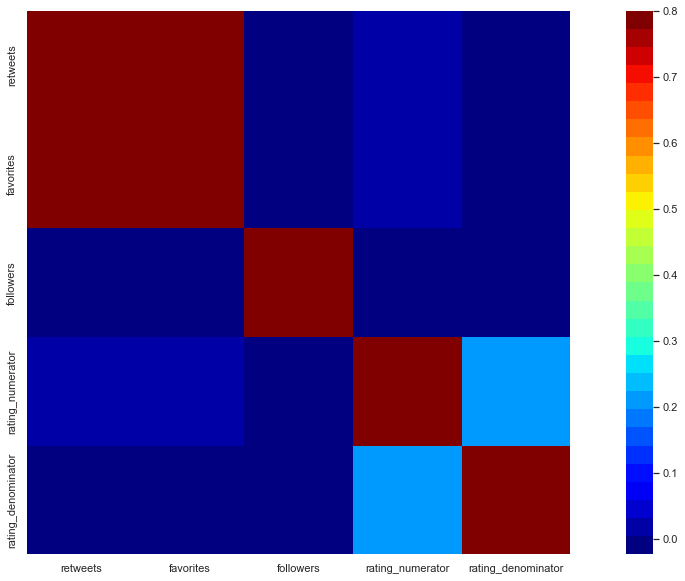

In [ ]:
# Correlation between numerical variables
num_cols_data = (archive_merged[['retweets','favorites', 'followers', 'rating_numerator', 'rating_denominator' ]])
matrix = num_cols_data.corr()
f, ax = plt.subplots(figsize=(20, 10))
cm1 = cm.get_cmap('jet', 30)
sns.heatmap(matrix, vmax=.8, square=True, cmap=cm1);

* It seems like Retweets and Favorites are highly correlated.This shows that people who have retweeted have also done with favorites tag. Hence both the distributions shows similar behaviour

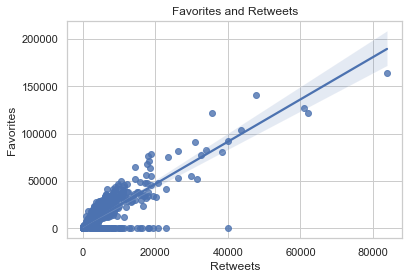

In [ ]:
graph = sns.regplot(x=archive_clean.retweets, y=archive_clean.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
# sns.plt.show()
fig = graph.get_figure()

Text(0, 0.5, 'Count %')

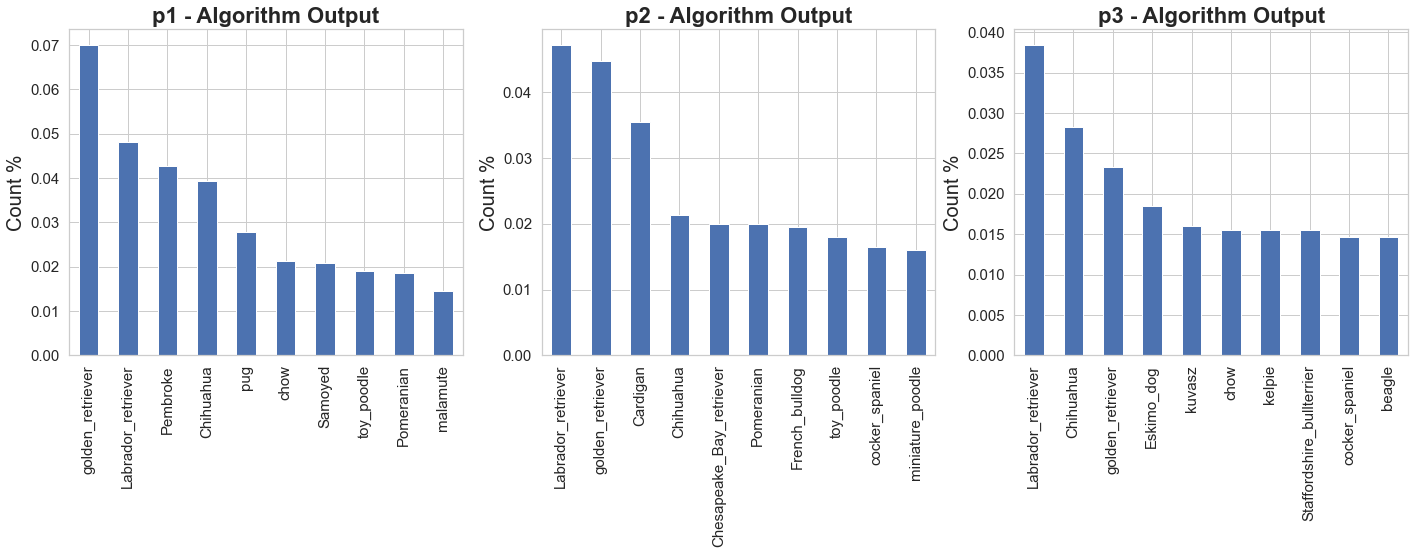

In [93]:
plt.figure(1)
plt.subplot(131)

archive_merged['p1'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p1 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(132)
archive_merged['p2'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p2 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(133)
archive_merged['p3'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p3 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)



* Majority of the predictions by 3 algorithms is done for golden_retriever, Labrador_retriever and Chihuahua dogs

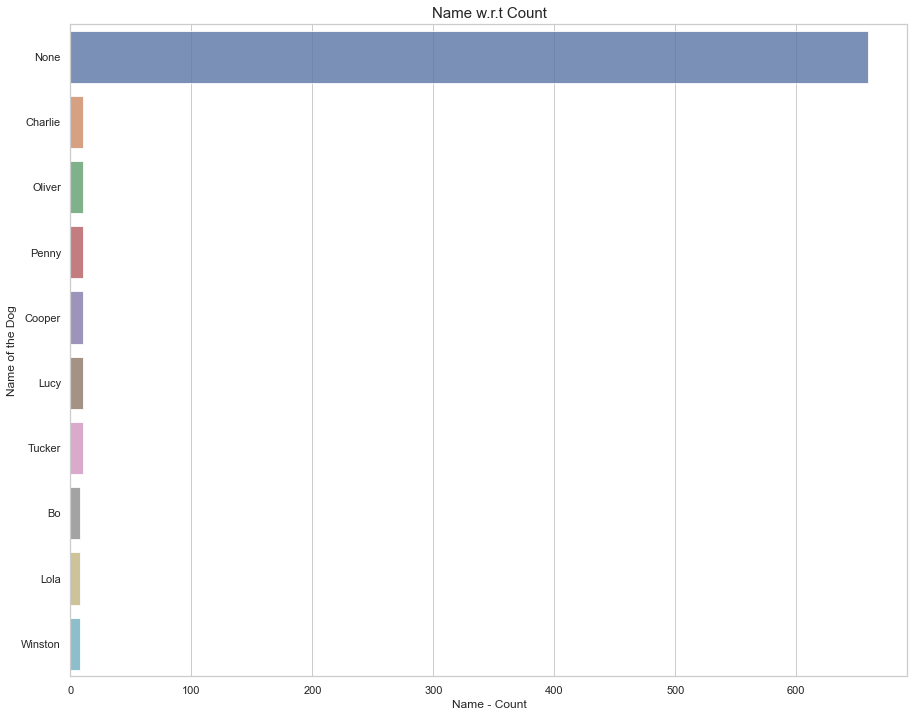

In [94]:
# Top dog name values based on the count
cnt_srs = archive_merged['name'].value_counts().head(10)
plt.figure(figsize=(15,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Name - Count', fontsize=12)
plt.ylabel('Name of the Dog', fontsize=12)
plt.title("Name w.r.t Count", fontsize=15)
plt.show()

majority of the dog name is none